#### Welcome to the `Efficient Self-Attention Intuition` Workshop!

In this workshop, we'll try to visually understand following concepts:
- Overlap Path Embedding/ Merging
- Efficient Self Attention

In [1]:
# basic imports
import pickle
import numpy as np
import matplotlib.pyplot as plt

from einops import rearrange

In [2]:
!wget https://thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com/attention_concept_data.pickle

--2025-03-17 21:17:18--  https://thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com/attention_concept_data.pickle
Resolving thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com (thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com)... 3.5.204.146, 16.12.20.38
Connecting to thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com (thinkautonomous-segmentation.s3.eu-west-3.amazonaws.com)|3.5.204.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92013117 (88M) [application/x-www-form-urlencoded]
Saving to: ‘attention_concept_data.pickle’

attention_concept_d 100%[===================>]  87.75M  4.39MB/s    in 22s     

2025-03-17 21:17:41 (4.06 MB/s) - ‘attention_concept_data.pickle’ saved [92013117/92013117]



## Read input data

In [3]:
with open('attention_concept_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

print(data.keys())

dict_keys(['key', 'query', 'value', 'attn', 'rgb_img', 'tf_img', 'patch_embed_output'])


In [4]:
print(data['rgb_img'].shape)

(512, 1024, 3)


Plot the image

In [5]:
def plot_single_channel_image(inputData, figsize, figTitle, save_plot = False, cmap = None,
                              plot_colorbar = False):
    
    fig = plt.figure(figsize=figsize)
    im = plt.imshow(inputData, cmap = cmap)
    plt.suptitle(figTitle)
    plt.axis('off')

    if plot_colorbar:
        fig.subplots_adjust(right= 0.9)
        cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax = cbar_ax)

    if save_plot:
        plt.savefig(f"{figTitle}.png")

Show the input image   

In [6]:
!pip install matplotlib==3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 2.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for matplotlib, since package 'wheel' is not installed.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1
  Running setup.py install for matplotlib ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for matplotlib did not run successfully.
  │ exit code: 1
  ╰─> [600 lines of output]
      
      Edit setup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.4.0]
            python: yes [3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]]
          platform: yes [linux]
             tests: no  [skipping due to configuration]
            macosx: no  [Mac OS-X only]
      
      running install
      /home/teck

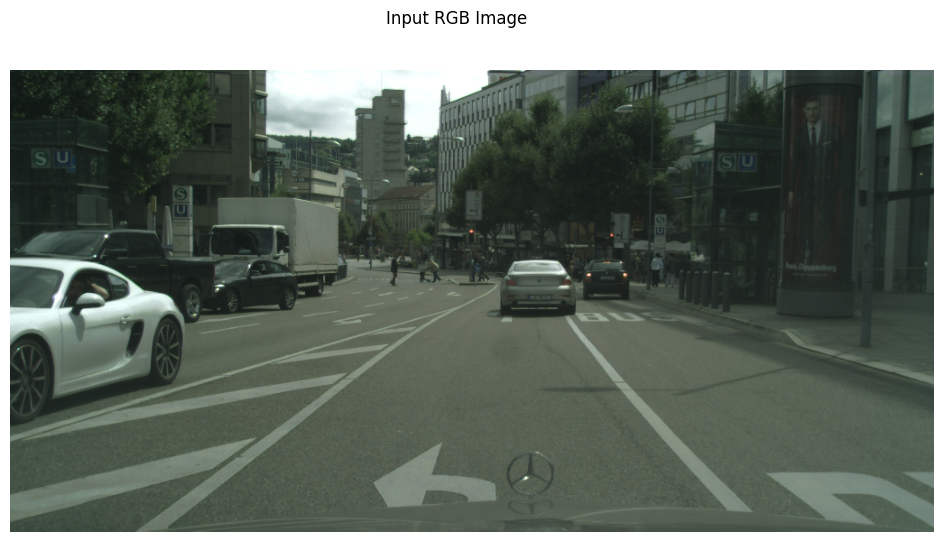

In [9]:
plot_single_channel_image(data['rgb_img'], (12,6), 'Input RGB Image')

# Overlap patch Embedding/ Merging

- Entire image is split into patches which are passed to consequent Transformer blocks
- This layer acts like Embedding layer using Convolution layers
- Initial stage outputs indicate low-level features like edge detection and more abstract features in later stages

In [13]:
def plot_channels(inputData, num_rows, num_cols, figsize, figTitle, save_plot= False,
                  cmap = None, plot_colorbar = False):
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
    axes = axes.flatten()

    for i in range(len(axes)):
        im = axes[i].imshow(inputData[i], cmap = cmap)
        axes[i].axis('off')
        fig.subplots_adjust(wspace = 0, hspace = 0)

    plt.suptitle(figTitle)

    if plot_colorbar:
        fig.subplots_adjust(right =0.9)
        cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax = cbar_ax)

    if save_plot:
        fig.savefig(f"{figTitle}.png")

patch_embed_output.shape = (32768, 64)
patch_embed_img.shape = (64, 128, 256)


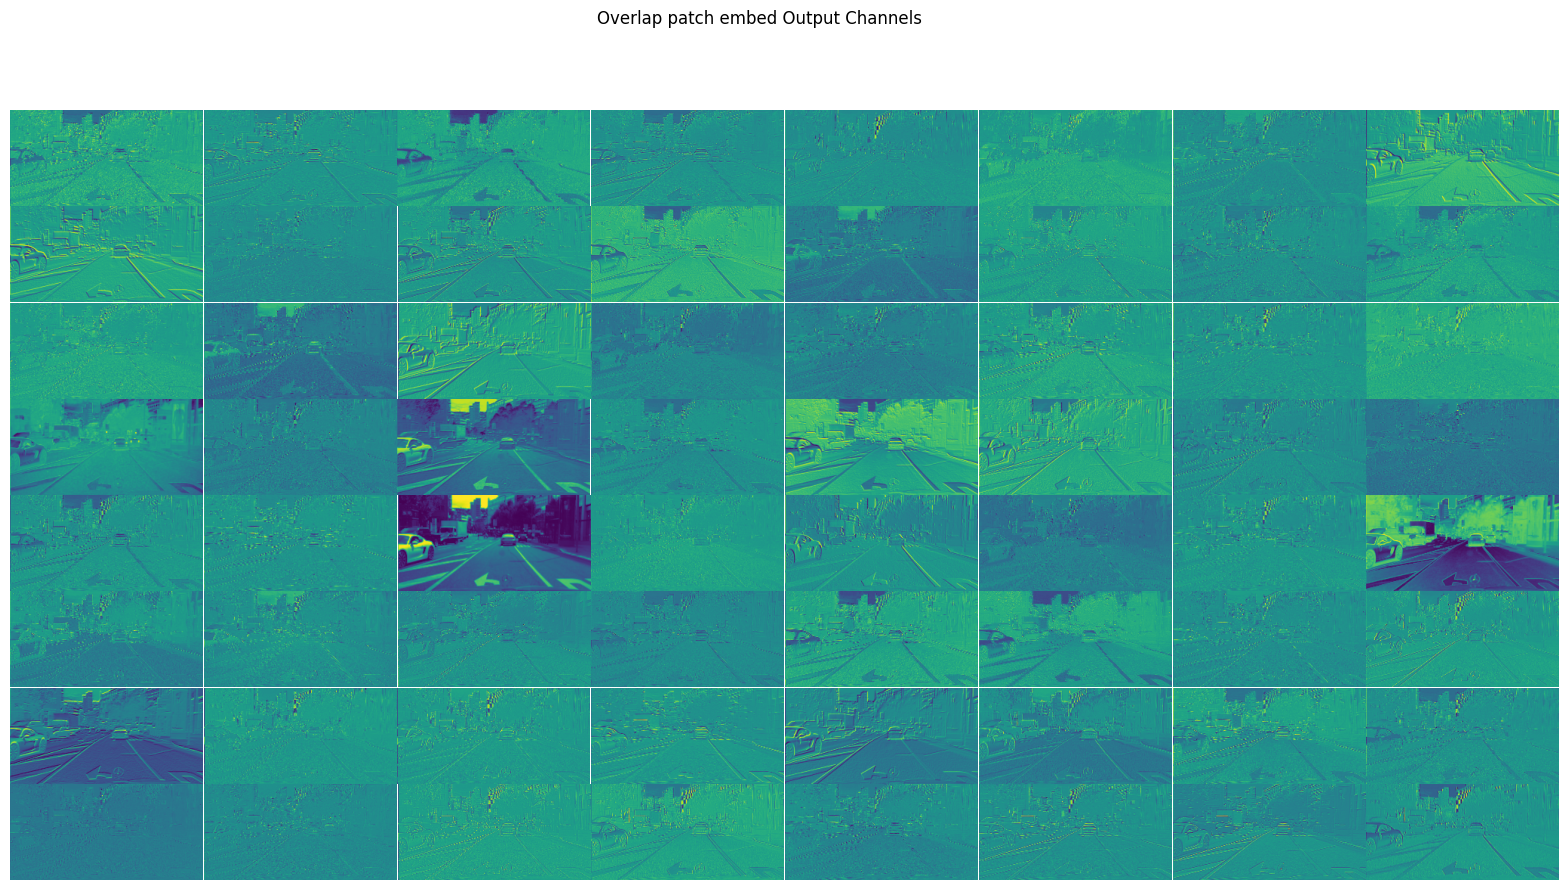

In [14]:
# read patch embedding layer output
patch_embed_output = data['patch_embed_output'][0]
print(f"patch_embed_output.shape = {patch_embed_output.shape}")

patch_embed_img = rearrange(patch_embed_output, '(h w) c -> c  h w', h = 128, w = 256)
print(f"patch_embed_img.shape = {patch_embed_img.shape}")

# plot each channel of patch embedding
plot_channels(patch_embed_img, 8, 8, (20, 10), 'Overlap patch embed Output Channels')

Attention mechanism

- Attention mechanism involves 3 components - Query, Key and Value
- It is a mapping of a query and a set of key-value pairs to an output
- Output is computed as a weighted sum of the values, where the weight assigned to each value is computed by similarity b/w query and corresponding key

In [15]:
print(data.keys())

dict_keys(['key', 'query', 'value', 'attn', 'rgb_img', 'tf_img', 'patch_embed_output'])


In [19]:
# Query
query = data['query'][0][0]
query_img = rearrange(query, '(h w) c -> c h w', h= 128, w = 256)
print(f"query_img.shape = {query_img.shape}")

query_img.shape = (64, 128, 256)


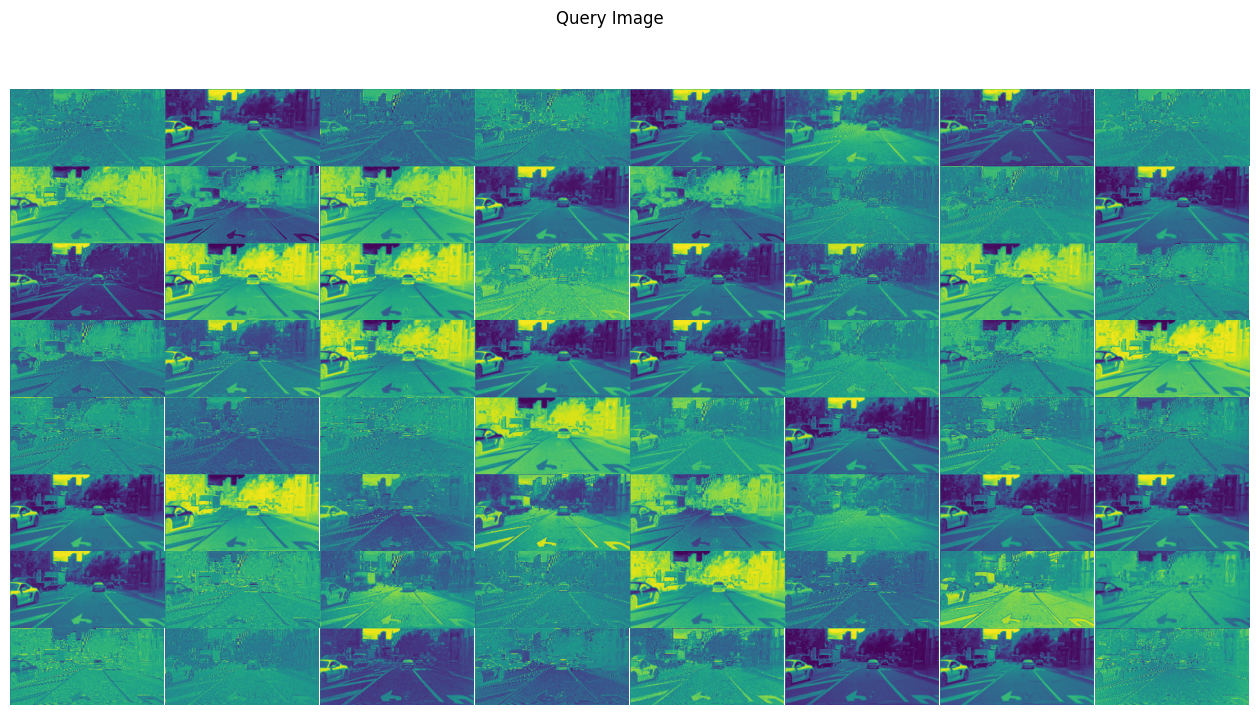

In [20]:
# plot each channel of Query
plot_channels(query_img, 8, 8, (16, 8), 'Query Image')

Key Visualization

- Key vector encodes that it's part of some object at some pixel resolution in input space and looking for features o specific type
- In Efficient self-attention, Key vector is << Query and hence appers pixelated

key_img.shape = (64, 16, 32)


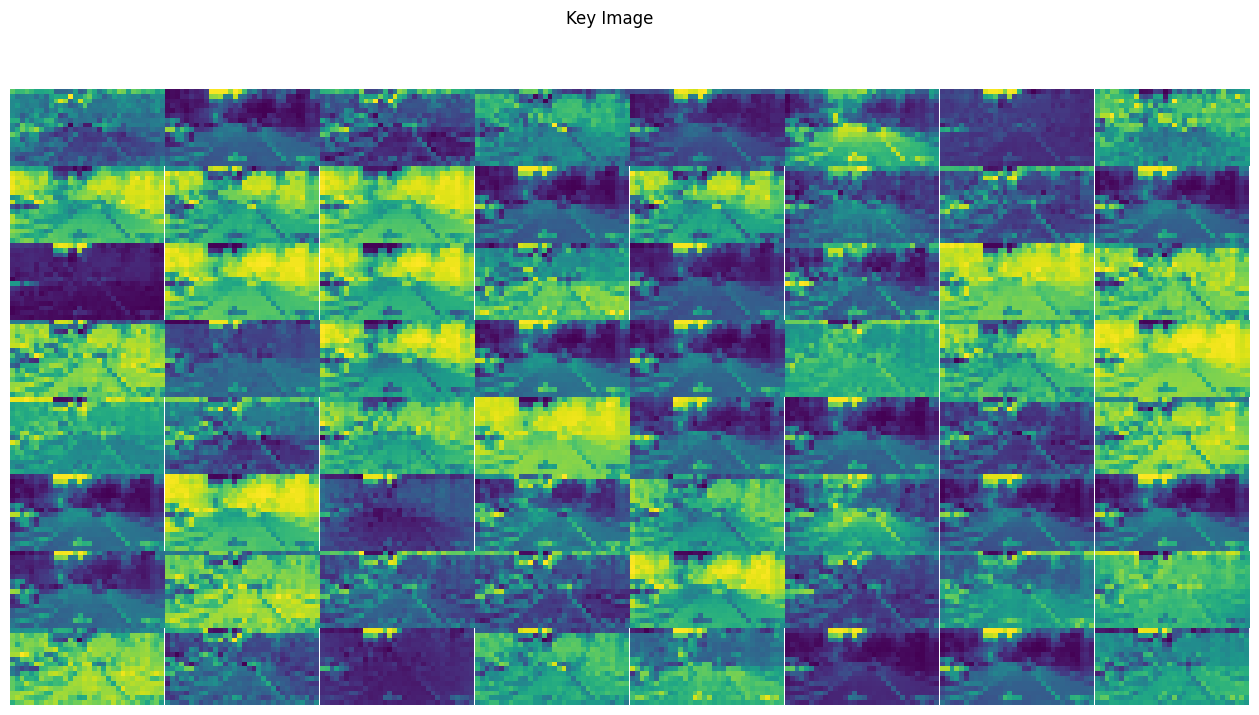

In [22]:
# Key for first stage first block of transformer
key = data['key'][0][0]
key_img = rearrange(key, '(h w) c -> c h w', h = 16, w = 32)
print(f"key_img.shape = {key_img.shape}")

# plot each channel of Key of Transformer
plot_channels(key_img, 8, 8, (16, 8), 'Key Image')

Attention (Q, K, V) = softmax(matmul(Q, K.T) / sqrt (d)) x V

- Dot product is computed b/w each pixel combination in Query and Key matrices
- Output is scaled by key dimension and then softmax is applied

attention_img.shape = (128, 256)


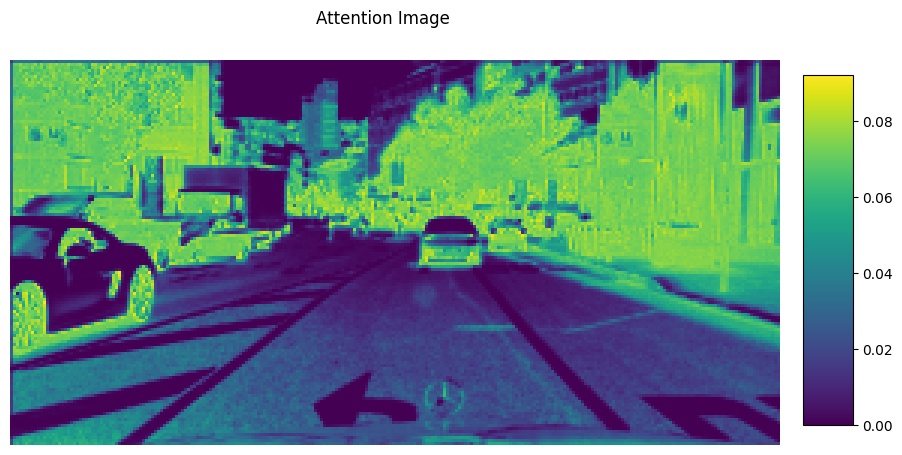

In [24]:
# Attention
attention = data['attn'][0, :, :, 0]
attention_img = attention.reshape(128, 256)
print(f"attention_img.shape = {attention_img.shape}")
plot_single_channel_image(attention_img, (10, 5), 'Attention Image', save_plot= True, plot_colorbar=True)

ROI selection